# Face Generation Using GAN (Generative Adversarial Network)
This project is a part of my Udacity Deep Learning Nanodegree certification. In this project, I used generative adversarial networks to generate new images of faces.
### Get the Data
This are the two datasets used in this project:
- MNIST
- CelebA

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

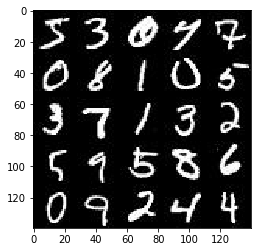

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

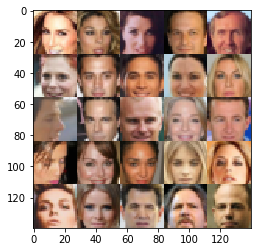

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [35]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.4.0


c:\users\sajib.sinha\appdata\local\continuum\anaconda3\envs\dlnd\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [36]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32,(None,image_height,image_width,image_channels),name='input_real')
    inputs_z = tf.placeholder(tf.float32,(None,z_dim),name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [37]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.2
    with tf.variable_scope('discriminator',reuse=reuse):
        x1 = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        relu1 = tf.maximum(alpha*x1,x1)
        #output_Shape = 14x14x64
        
        x2 = tf.layers.conv2d(relu1,128,5,strides=2,padding='same')
        bn2 = tf.layers.batch_normalization(x2,training=True)
        relu2 = tf.maximum(alpha*bn2,bn2)
        #output_Shape = 7x7x128
        
        x3 = tf.layers.conv2d(relu2,256,5,strides=2,padding='same')
        bn3 = tf.layers.batch_normalization(x3,training=True)
        relu3 = tf.maximum(alpha*bn3,bn3)
        #output_Shape = 4x4x256
        
        flat = tf.reshape(relu3,(-1,4*4*256))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [38]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator',reuse=not is_train):
        x1 = tf.layers.dense(z,4*4*256)
        
        x1 = tf.reshape(x1,(-1,4,4,256))
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(alpha*x1,x1)
        # 4x4x256
        
        x2 = tf.layers.conv2d_transpose(x1,128,4,strides=1,padding='valid')
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(alpha*x2,x2)
        # 7x7x128
        
        x3 = tf.layers.conv2d_transpose(x2,64,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(alpha*x3,x3)
        # 14x14x64
        
        logits = tf.layers.conv2d_transpose(x3,out_channel_dim,5,strides=2,padding='same')
        #28x28x3
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [39]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z,out_channel_dim,is_train=True)
    d_model_real,d_logits_real = discriminator(input_real,reuse=False)
    d_model_fake,d_logits_fake = discriminator(g_model,reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_model_fake)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [40]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss,var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss,var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [42]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    image_width = data_shape[1] 
    image_height = data_shape[2]  
    image_channels = data_shape[3] 
    
    inputs_real, inputs_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)   
    d_loss, g_loss = model_loss(inputs_real, inputs_z, image_channels)    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    losses = []
    steps = 0
    print_every=10 
    show_every=100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z: batch_z,inputs_real: batch_images, lr:learning_rate})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    if steps % show_every == 0:
                        show_generator_output(sess, 25, inputs_z, image_channels, data_image_mode)

                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9213... Generator Loss: 7.4068
Epoch 1/2... Discriminator Loss: 0.9105... Generator Loss: 0.6270
Epoch 1/2... Discriminator Loss: 1.2053... Generator Loss: 0.7290
Epoch 1/2... Discriminator Loss: 0.2840... Generator Loss: 9.8818
Epoch 1/2... Discriminator Loss: 0.1691... Generator Loss: 4.4767
Epoch 1/2... Discriminator Loss: 0.9784... Generator Loss: 0.7997
Epoch 1/2... Discriminator Loss: 0.4683... Generator Loss: 1.7784
Epoch 1/2... Discriminator Loss: 0.7743... Generator Loss: 3.6683
Epoch 1/2... Discriminator Loss: 0.9905... Generator Loss: 4.4859
Epoch 1/2... Discriminator Loss: 0.7551... Generator Loss: 1.4666


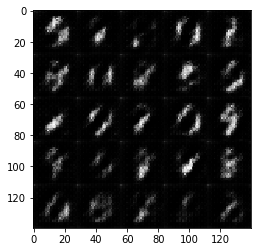

Epoch 1/2... Discriminator Loss: 1.3269... Generator Loss: 0.7004
Epoch 1/2... Discriminator Loss: 1.3186... Generator Loss: 1.2849
Epoch 1/2... Discriminator Loss: 0.7578... Generator Loss: 1.5050
Epoch 1/2... Discriminator Loss: 0.9905... Generator Loss: 0.9264
Epoch 1/2... Discriminator Loss: 1.3047... Generator Loss: 0.4925
Epoch 1/2... Discriminator Loss: 0.9690... Generator Loss: 1.0581
Epoch 1/2... Discriminator Loss: 1.2136... Generator Loss: 0.5629
Epoch 1/2... Discriminator Loss: 0.9586... Generator Loss: 1.1652
Epoch 1/2... Discriminator Loss: 1.3730... Generator Loss: 0.4345
Epoch 1/2... Discriminator Loss: 0.8645... Generator Loss: 1.0113


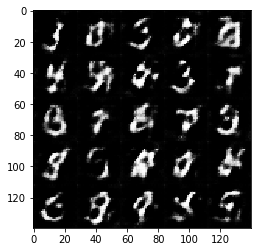

Epoch 1/2... Discriminator Loss: 0.9480... Generator Loss: 1.6421
Epoch 1/2... Discriminator Loss: 1.4028... Generator Loss: 0.6001
Epoch 1/2... Discriminator Loss: 1.3434... Generator Loss: 0.4549
Epoch 1/2... Discriminator Loss: 1.2633... Generator Loss: 0.5296
Epoch 1/2... Discriminator Loss: 1.0269... Generator Loss: 0.8544
Epoch 1/2... Discriminator Loss: 0.9260... Generator Loss: 1.6110
Epoch 1/2... Discriminator Loss: 1.0107... Generator Loss: 0.9945
Epoch 1/2... Discriminator Loss: 1.4304... Generator Loss: 1.8323
Epoch 1/2... Discriminator Loss: 1.2321... Generator Loss: 1.5878
Epoch 1/2... Discriminator Loss: 1.2685... Generator Loss: 0.5070


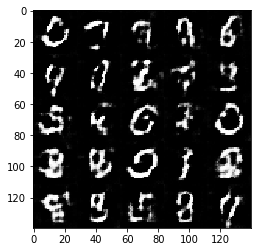

Epoch 1/2... Discriminator Loss: 1.6946... Generator Loss: 2.6693
Epoch 1/2... Discriminator Loss: 1.7472... Generator Loss: 0.2545
Epoch 1/2... Discriminator Loss: 0.9245... Generator Loss: 0.9513
Epoch 1/2... Discriminator Loss: 0.8107... Generator Loss: 1.7652
Epoch 1/2... Discriminator Loss: 1.5475... Generator Loss: 2.4952
Epoch 1/2... Discriminator Loss: 1.3036... Generator Loss: 0.4577
Epoch 1/2... Discriminator Loss: 1.3388... Generator Loss: 0.3868
Epoch 1/2... Discriminator Loss: 0.7806... Generator Loss: 1.2793
Epoch 1/2... Discriminator Loss: 1.5259... Generator Loss: 0.4670
Epoch 1/2... Discriminator Loss: 1.1926... Generator Loss: 0.6894


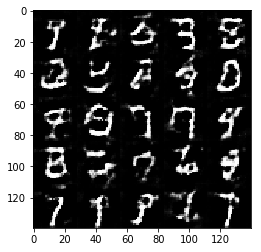

Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6698
Epoch 1/2... Discriminator Loss: 1.2402... Generator Loss: 1.9090
Epoch 1/2... Discriminator Loss: 1.1575... Generator Loss: 1.6557
Epoch 1/2... Discriminator Loss: 0.9637... Generator Loss: 0.7807
Epoch 1/2... Discriminator Loss: 0.7639... Generator Loss: 1.3424
Epoch 1/2... Discriminator Loss: 1.1590... Generator Loss: 0.5748
Epoch 1/2... Discriminator Loss: 1.1083... Generator Loss: 0.6321
Epoch 1/2... Discriminator Loss: 1.0215... Generator Loss: 0.7931
Epoch 1/2... Discriminator Loss: 0.9471... Generator Loss: 1.5452
Epoch 1/2... Discriminator Loss: 0.7984... Generator Loss: 1.1836


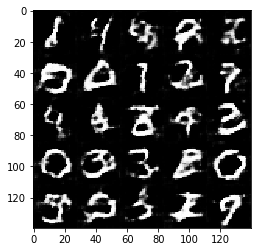

Epoch 1/2... Discriminator Loss: 0.9995... Generator Loss: 1.1183
Epoch 1/2... Discriminator Loss: 1.1305... Generator Loss: 1.2941
Epoch 1/2... Discriminator Loss: 1.0244... Generator Loss: 1.1339
Epoch 1/2... Discriminator Loss: 0.9741... Generator Loss: 1.0199
Epoch 1/2... Discriminator Loss: 0.9276... Generator Loss: 1.1386
Epoch 1/2... Discriminator Loss: 0.9662... Generator Loss: 1.2169
Epoch 1/2... Discriminator Loss: 1.3298... Generator Loss: 0.4382
Epoch 1/2... Discriminator Loss: 1.0594... Generator Loss: 0.6226
Epoch 1/2... Discriminator Loss: 0.7862... Generator Loss: 1.6183
Epoch 1/2... Discriminator Loss: 0.9975... Generator Loss: 0.7925


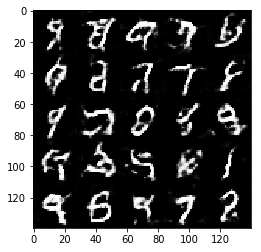

Epoch 1/2... Discriminator Loss: 0.9198... Generator Loss: 1.3073
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 1.0862
Epoch 1/2... Discriminator Loss: 1.1466... Generator Loss: 0.6606
Epoch 1/2... Discriminator Loss: 0.9425... Generator Loss: 0.7927
Epoch 1/2... Discriminator Loss: 1.0633... Generator Loss: 2.0868
Epoch 1/2... Discriminator Loss: 1.1382... Generator Loss: 0.6155
Epoch 1/2... Discriminator Loss: 1.1330... Generator Loss: 0.6738
Epoch 1/2... Discriminator Loss: 1.1703... Generator Loss: 0.6264
Epoch 1/2... Discriminator Loss: 0.9997... Generator Loss: 1.1457
Epoch 1/2... Discriminator Loss: 1.0798... Generator Loss: 0.7203


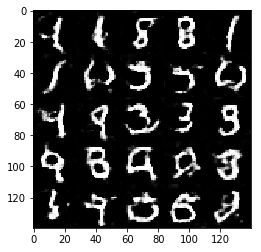

Epoch 1/2... Discriminator Loss: 1.0069... Generator Loss: 1.1555
Epoch 1/2... Discriminator Loss: 0.8986... Generator Loss: 1.0668
Epoch 1/2... Discriminator Loss: 0.9844... Generator Loss: 0.8372
Epoch 1/2... Discriminator Loss: 0.9292... Generator Loss: 0.7444
Epoch 1/2... Discriminator Loss: 1.1026... Generator Loss: 0.7328
Epoch 1/2... Discriminator Loss: 0.9713... Generator Loss: 0.7863
Epoch 1/2... Discriminator Loss: 1.0544... Generator Loss: 0.5934
Epoch 1/2... Discriminator Loss: 1.1303... Generator Loss: 1.6955
Epoch 1/2... Discriminator Loss: 1.1869... Generator Loss: 0.5546
Epoch 1/2... Discriminator Loss: 1.0088... Generator Loss: 1.1212


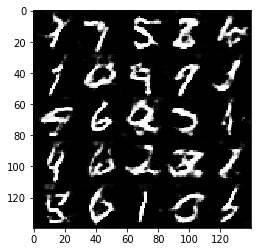

Epoch 1/2... Discriminator Loss: 0.8229... Generator Loss: 0.9552
Epoch 1/2... Discriminator Loss: 1.2214... Generator Loss: 0.9543
Epoch 1/2... Discriminator Loss: 1.1762... Generator Loss: 0.5501
Epoch 1/2... Discriminator Loss: 1.0659... Generator Loss: 0.6174
Epoch 1/2... Discriminator Loss: 0.8814... Generator Loss: 0.7374
Epoch 1/2... Discriminator Loss: 2.0970... Generator Loss: 0.1978
Epoch 1/2... Discriminator Loss: 1.2287... Generator Loss: 1.1351
Epoch 1/2... Discriminator Loss: 0.8675... Generator Loss: 0.9121
Epoch 1/2... Discriminator Loss: 0.8720... Generator Loss: 1.2086
Epoch 1/2... Discriminator Loss: 1.1050... Generator Loss: 0.5107


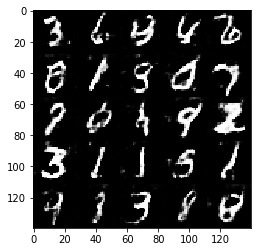

Epoch 1/2... Discriminator Loss: 1.4174... Generator Loss: 1.3526
Epoch 1/2... Discriminator Loss: 0.8925... Generator Loss: 1.0657
Epoch 1/2... Discriminator Loss: 1.0524... Generator Loss: 1.6882
Epoch 2/2... Discriminator Loss: 0.8569... Generator Loss: 0.7750
Epoch 2/2... Discriminator Loss: 0.8789... Generator Loss: 1.0304
Epoch 2/2... Discriminator Loss: 0.9080... Generator Loss: 0.7301
Epoch 2/2... Discriminator Loss: 1.0577... Generator Loss: 0.7613
Epoch 2/2... Discriminator Loss: 1.4075... Generator Loss: 1.3159
Epoch 2/2... Discriminator Loss: 0.9249... Generator Loss: 1.3399
Epoch 2/2... Discriminator Loss: 0.9668... Generator Loss: 0.9168


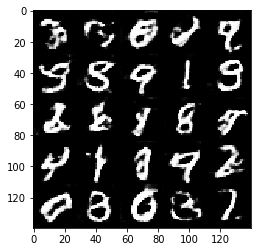

Epoch 2/2... Discriminator Loss: 0.7519... Generator Loss: 1.1202
Epoch 2/2... Discriminator Loss: 0.5869... Generator Loss: 1.4355
Epoch 2/2... Discriminator Loss: 0.7516... Generator Loss: 1.0702
Epoch 2/2... Discriminator Loss: 0.8862... Generator Loss: 1.6863
Epoch 2/2... Discriminator Loss: 1.4434... Generator Loss: 0.3815
Epoch 2/2... Discriminator Loss: 1.3486... Generator Loss: 0.3891
Epoch 2/2... Discriminator Loss: 1.1914... Generator Loss: 0.4697
Epoch 2/2... Discriminator Loss: 0.8432... Generator Loss: 0.8636
Epoch 2/2... Discriminator Loss: 2.1202... Generator Loss: 3.2440
Epoch 2/2... Discriminator Loss: 0.8385... Generator Loss: 2.4345


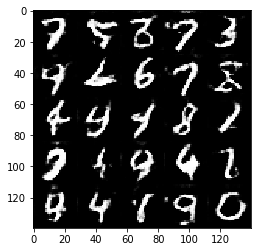

Epoch 2/2... Discriminator Loss: 0.6659... Generator Loss: 1.0569
Epoch 2/2... Discriminator Loss: 1.4616... Generator Loss: 0.3626
Epoch 2/2... Discriminator Loss: 1.8491... Generator Loss: 0.2418
Epoch 2/2... Discriminator Loss: 1.2587... Generator Loss: 2.1482
Epoch 2/2... Discriminator Loss: 1.3137... Generator Loss: 0.4576
Epoch 2/2... Discriminator Loss: 0.7761... Generator Loss: 1.0641
Epoch 2/2... Discriminator Loss: 1.1588... Generator Loss: 0.5376
Epoch 2/2... Discriminator Loss: 0.6838... Generator Loss: 0.9439
Epoch 2/2... Discriminator Loss: 7.9900... Generator Loss: 10.0799
Epoch 2/2... Discriminator Loss: 0.8914... Generator Loss: 0.7652


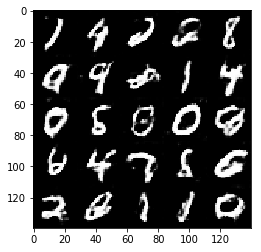

Epoch 2/2... Discriminator Loss: 0.7904... Generator Loss: 0.9612
Epoch 2/2... Discriminator Loss: 0.7978... Generator Loss: 0.9309
Epoch 2/2... Discriminator Loss: 1.0468... Generator Loss: 0.6210
Epoch 2/2... Discriminator Loss: 1.2345... Generator Loss: 0.5755
Epoch 2/2... Discriminator Loss: 0.6764... Generator Loss: 1.2799
Epoch 2/2... Discriminator Loss: 1.7131... Generator Loss: 2.7876
Epoch 2/2... Discriminator Loss: 0.9201... Generator Loss: 0.8577
Epoch 2/2... Discriminator Loss: 0.8593... Generator Loss: 1.2687
Epoch 2/2... Discriminator Loss: 0.6018... Generator Loss: 1.1319
Epoch 2/2... Discriminator Loss: 0.9184... Generator Loss: 2.9500


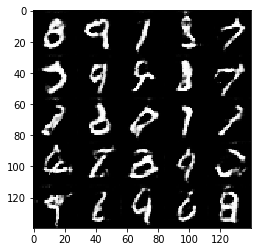

Epoch 2/2... Discriminator Loss: 0.7733... Generator Loss: 0.9231
Epoch 2/2... Discriminator Loss: 1.4481... Generator Loss: 2.2717
Epoch 2/2... Discriminator Loss: 0.6643... Generator Loss: 1.7126
Epoch 2/2... Discriminator Loss: 0.6584... Generator Loss: 1.4011
Epoch 2/2... Discriminator Loss: 1.2137... Generator Loss: 0.4933
Epoch 2/2... Discriminator Loss: 1.0250... Generator Loss: 0.7509
Epoch 2/2... Discriminator Loss: 0.7833... Generator Loss: 1.7927
Epoch 2/2... Discriminator Loss: 0.9591... Generator Loss: 0.6526
Epoch 2/2... Discriminator Loss: 0.4452... Generator Loss: 1.4261
Epoch 2/2... Discriminator Loss: 0.7752... Generator Loss: 2.0751


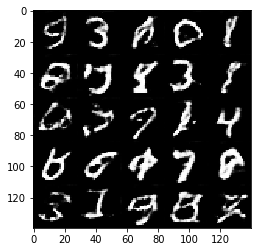

Epoch 2/2... Discriminator Loss: 0.9299... Generator Loss: 0.8719
Epoch 2/2... Discriminator Loss: 0.6535... Generator Loss: 1.8279
Epoch 2/2... Discriminator Loss: 1.2932... Generator Loss: 0.4118
Epoch 2/2... Discriminator Loss: 0.6744... Generator Loss: 0.9754
Epoch 2/2... Discriminator Loss: 0.7964... Generator Loss: 0.8955
Epoch 2/2... Discriminator Loss: 2.9133... Generator Loss: 0.0826
Epoch 2/2... Discriminator Loss: 0.9750... Generator Loss: 0.7317
Epoch 2/2... Discriminator Loss: 0.7038... Generator Loss: 0.9842
Epoch 2/2... Discriminator Loss: 0.7509... Generator Loss: 1.1194
Epoch 2/2... Discriminator Loss: 0.5629... Generator Loss: 1.6059


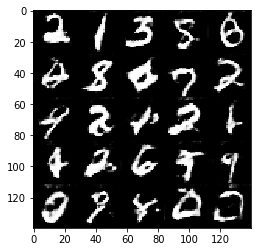

Epoch 2/2... Discriminator Loss: 0.5881... Generator Loss: 1.2668
Epoch 2/2... Discriminator Loss: 0.5092... Generator Loss: 1.4851
Epoch 2/2... Discriminator Loss: 0.4943... Generator Loss: 1.2678
Epoch 2/2... Discriminator Loss: 0.6183... Generator Loss: 1.1047
Epoch 2/2... Discriminator Loss: 0.9672... Generator Loss: 2.7114
Epoch 2/2... Discriminator Loss: 1.0614... Generator Loss: 1.0317
Epoch 2/2... Discriminator Loss: 1.1227... Generator Loss: 0.5943
Epoch 2/2... Discriminator Loss: 0.5423... Generator Loss: 1.5891
Epoch 2/2... Discriminator Loss: 2.0415... Generator Loss: 0.2324
Epoch 2/2... Discriminator Loss: 1.7724... Generator Loss: 0.3253


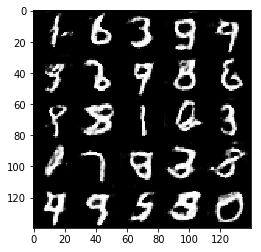

Epoch 2/2... Discriminator Loss: 1.1081... Generator Loss: 0.6268
Epoch 2/2... Discriminator Loss: 0.5307... Generator Loss: 1.5523
Epoch 2/2... Discriminator Loss: 0.6268... Generator Loss: 1.1750
Epoch 2/2... Discriminator Loss: 0.6560... Generator Loss: 1.2196
Epoch 2/2... Discriminator Loss: 0.4380... Generator Loss: 1.9454
Epoch 2/2... Discriminator Loss: 2.2860... Generator Loss: 0.2213
Epoch 2/2... Discriminator Loss: 0.6957... Generator Loss: 1.2130
Epoch 2/2... Discriminator Loss: 0.5124... Generator Loss: 2.6371
Epoch 2/2... Discriminator Loss: 1.0001... Generator Loss: 0.7499
Epoch 2/2... Discriminator Loss: 0.9050... Generator Loss: 0.7448


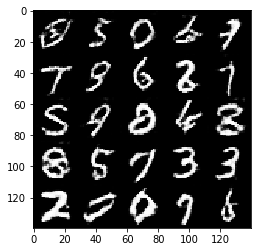

Epoch 2/2... Discriminator Loss: 2.2966... Generator Loss: 0.2299
Epoch 2/2... Discriminator Loss: 0.8119... Generator Loss: 0.9162
Epoch 2/2... Discriminator Loss: 1.1293... Generator Loss: 0.5886
Epoch 2/2... Discriminator Loss: 0.8174... Generator Loss: 0.9722
Epoch 2/2... Discriminator Loss: 0.6379... Generator Loss: 1.3977
Epoch 2/2... Discriminator Loss: 0.4768... Generator Loss: 1.4124
Epoch 2/2... Discriminator Loss: 0.8455... Generator Loss: 0.8723
Epoch 2/2... Discriminator Loss: 2.2814... Generator Loss: 0.2372
Epoch 2/2... Discriminator Loss: 0.7832... Generator Loss: 0.8973
Epoch 2/2... Discriminator Loss: 2.1068... Generator Loss: 1.5232


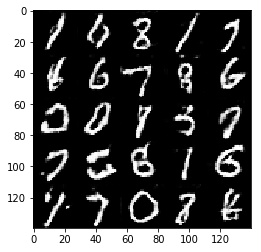

Epoch 2/2... Discriminator Loss: 0.9104... Generator Loss: 0.8554
Epoch 2/2... Discriminator Loss: 1.0579... Generator Loss: 0.6343
Epoch 2/2... Discriminator Loss: 0.7797... Generator Loss: 0.9973
Epoch 2/2... Discriminator Loss: 0.9650... Generator Loss: 0.7431
Epoch 2/2... Discriminator Loss: 0.6544... Generator Loss: 1.1543
Epoch 2/2... Discriminator Loss: 1.1001... Generator Loss: 0.7709
Epoch 2/2... Discriminator Loss: 0.7246... Generator Loss: 1.0860


In [43]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 8.2434
Epoch 1/1... Discriminator Loss: 0.2235... Generator Loss: 15.3000
Epoch 1/1... Discriminator Loss: 0.4658... Generator Loss: 1.3446
Epoch 1/1... Discriminator Loss: 0.1236... Generator Loss: 10.2485
Epoch 1/1... Discriminator Loss: 0.5637... Generator Loss: 5.2659
Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 0.1523... Generator Loss: 2.6261
Epoch 1/1... Discriminator Loss: 1.1208... Generator Loss: 4.5605
Epoch 1/1... Discriminator Loss: 0.5551... Generator Loss: 1.8275
Epoch 1/1... Discriminator Loss: 3.0400... Generator Loss: 8.9083


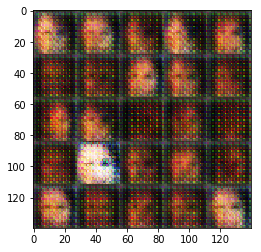

Epoch 1/1... Discriminator Loss: 0.7737... Generator Loss: 1.1865
Epoch 1/1... Discriminator Loss: 0.8490... Generator Loss: 4.7342
Epoch 1/1... Discriminator Loss: 0.5757... Generator Loss: 7.0462
Epoch 1/1... Discriminator Loss: 0.4364... Generator Loss: 2.6528
Epoch 1/1... Discriminator Loss: 0.9310... Generator Loss: 2.0471
Epoch 1/1... Discriminator Loss: 1.8378... Generator Loss: 5.6230
Epoch 1/1... Discriminator Loss: 1.0176... Generator Loss: 1.9316
Epoch 1/1... Discriminator Loss: 0.5467... Generator Loss: 1.4707
Epoch 1/1... Discriminator Loss: 1.0722... Generator Loss: 0.9646
Epoch 1/1... Discriminator Loss: 1.0611... Generator Loss: 0.5671


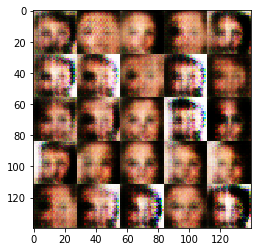

Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 1.3260
Epoch 1/1... Discriminator Loss: 1.8954... Generator Loss: 3.2750
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.4345
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 0.5557... Generator Loss: 1.4678
Epoch 1/1... Discriminator Loss: 0.7837... Generator Loss: 1.2254
Epoch 1/1... Discriminator Loss: 0.6679... Generator Loss: 1.1530
Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 2.1505
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 2.5582
Epoch 1/1... Discriminator Loss: 0.6808... Generator Loss: 0.9198


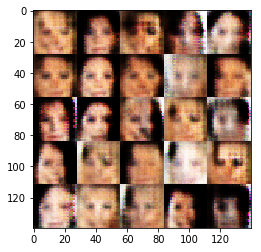

Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 2.8012
Epoch 1/1... Discriminator Loss: 0.8109... Generator Loss: 0.8584
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 4.1756
Epoch 1/1... Discriminator Loss: 0.7816... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 0.5206... Generator Loss: 1.4595
Epoch 1/1... Discriminator Loss: 0.7082... Generator Loss: 1.0039
Epoch 1/1... Discriminator Loss: 0.4195... Generator Loss: 2.1084
Epoch 1/1... Discriminator Loss: 1.1979... Generator Loss: 0.5464
Epoch 1/1... Discriminator Loss: 2.6262... Generator Loss: 3.8367
Epoch 1/1... Discriminator Loss: 0.8793... Generator Loss: 1.7623


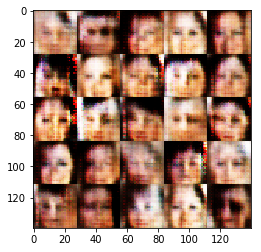

Epoch 1/1... Discriminator Loss: 0.9155... Generator Loss: 0.8628
Epoch 1/1... Discriminator Loss: 2.0158... Generator Loss: 4.0250
Epoch 1/1... Discriminator Loss: 1.8630... Generator Loss: 0.2391
Epoch 1/1... Discriminator Loss: 1.0723... Generator Loss: 0.5555
Epoch 1/1... Discriminator Loss: 0.5808... Generator Loss: 1.4825
Epoch 1/1... Discriminator Loss: 0.9663... Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 0.6624... Generator Loss: 0.9578
Epoch 1/1... Discriminator Loss: 0.6177... Generator Loss: 1.3029
Epoch 1/1... Discriminator Loss: 0.5628... Generator Loss: 1.2772
Epoch 1/1... Discriminator Loss: 1.0531... Generator Loss: 0.6106


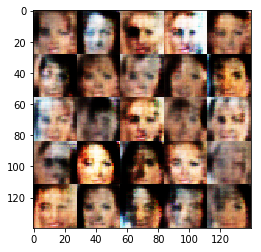

Epoch 1/1... Discriminator Loss: 1.0682... Generator Loss: 0.5516
Epoch 1/1... Discriminator Loss: 0.6408... Generator Loss: 1.0869
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 2.8664
Epoch 1/1... Discriminator Loss: 1.7081... Generator Loss: 3.5366
Epoch 1/1... Discriminator Loss: 0.7239... Generator Loss: 1.5936
Epoch 1/1... Discriminator Loss: 0.7100... Generator Loss: 2.6522
Epoch 1/1... Discriminator Loss: 1.2441... Generator Loss: 4.6883
Epoch 1/1... Discriminator Loss: 0.2730... Generator Loss: 2.0385
Epoch 1/1... Discriminator Loss: 1.9666... Generator Loss: 5.9954
Epoch 1/1... Discriminator Loss: 0.6950... Generator Loss: 4.4498


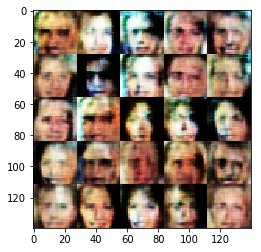

Epoch 1/1... Discriminator Loss: 0.5925... Generator Loss: 2.6421
Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 1.6427
Epoch 1/1... Discriminator Loss: 0.9057... Generator Loss: 1.1790
Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 1.1939
Epoch 1/1... Discriminator Loss: 0.6166... Generator Loss: 1.0819
Epoch 1/1... Discriminator Loss: 1.2320... Generator Loss: 2.5319
Epoch 1/1... Discriminator Loss: 0.8279... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 0.6092... Generator Loss: 1.3458
Epoch 1/1... Discriminator Loss: 0.5516... Generator Loss: 2.8551
Epoch 1/1... Discriminator Loss: 0.3059... Generator Loss: 2.0447


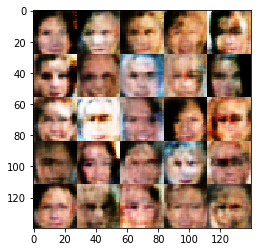

Epoch 1/1... Discriminator Loss: 1.0600... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 0.5220... Generator Loss: 2.7519
Epoch 1/1... Discriminator Loss: 0.4063... Generator Loss: 1.5258
Epoch 1/1... Discriminator Loss: 0.3102... Generator Loss: 1.8145
Epoch 1/1... Discriminator Loss: 3.0875... Generator Loss: 0.0759
Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 0.7915
Epoch 1/1... Discriminator Loss: 0.9907... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 0.7510... Generator Loss: 0.8891
Epoch 1/1... Discriminator Loss: 1.1367... Generator Loss: 2.4278
Epoch 1/1... Discriminator Loss: 1.7019... Generator Loss: 3.5157


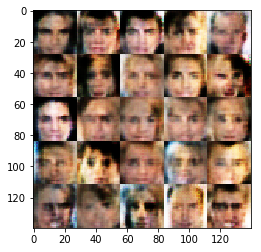

Epoch 1/1... Discriminator Loss: 1.2370... Generator Loss: 0.5539
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.4088
Epoch 1/1... Discriminator Loss: 0.9048... Generator Loss: 3.3071
Epoch 1/1... Discriminator Loss: 0.3688... Generator Loss: 2.1956
Epoch 1/1... Discriminator Loss: 0.4740... Generator Loss: 4.1353
Epoch 1/1... Discriminator Loss: 0.3359... Generator Loss: 2.7147
Epoch 1/1... Discriminator Loss: 1.0505... Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 0.6981... Generator Loss: 0.8698
Epoch 1/1... Discriminator Loss: 0.5634... Generator Loss: 1.2180
Epoch 1/1... Discriminator Loss: 0.3155... Generator Loss: 2.0745


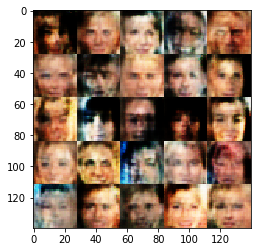

Epoch 1/1... Discriminator Loss: 0.7215... Generator Loss: 1.0149
Epoch 1/1... Discriminator Loss: 0.1796... Generator Loss: 2.7853
Epoch 1/1... Discriminator Loss: 1.6683... Generator Loss: 0.3069
Epoch 1/1... Discriminator Loss: 0.3229... Generator Loss: 1.9700
Epoch 1/1... Discriminator Loss: 0.5005... Generator Loss: 3.0020
Epoch 1/1... Discriminator Loss: 0.1658... Generator Loss: 2.7796
Epoch 1/1... Discriminator Loss: 0.1695... Generator Loss: 2.9753
Epoch 1/1... Discriminator Loss: 0.0821... Generator Loss: 4.0330
Epoch 1/1... Discriminator Loss: 1.0333... Generator Loss: 4.1376
Epoch 1/1... Discriminator Loss: 0.4670... Generator Loss: 3.6611


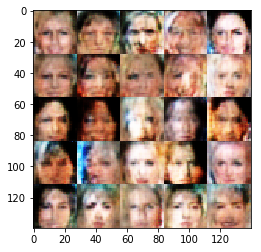

Epoch 1/1... Discriminator Loss: 0.8289... Generator Loss: 1.2281
Epoch 1/1... Discriminator Loss: 1.4591... Generator Loss: 0.3542
Epoch 1/1... Discriminator Loss: 1.2152... Generator Loss: 0.5993
Epoch 1/1... Discriminator Loss: 0.6120... Generator Loss: 0.9688
Epoch 1/1... Discriminator Loss: 0.4319... Generator Loss: 2.5279
Epoch 1/1... Discriminator Loss: 0.4609... Generator Loss: 1.5763
Epoch 1/1... Discriminator Loss: 0.5691... Generator Loss: 1.2421
Epoch 1/1... Discriminator Loss: 1.0383... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 0.5253... Generator Loss: 1.3462
Epoch 1/1... Discriminator Loss: 0.2817... Generator Loss: 1.7520


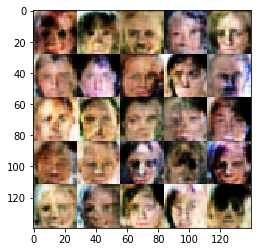

Epoch 1/1... Discriminator Loss: 3.0756... Generator Loss: 3.8365
Epoch 1/1... Discriminator Loss: 0.6471... Generator Loss: 1.0733
Epoch 1/1... Discriminator Loss: 1.5331... Generator Loss: 0.3723
Epoch 1/1... Discriminator Loss: 0.5833... Generator Loss: 3.8178
Epoch 1/1... Discriminator Loss: 1.1655... Generator Loss: 0.5793
Epoch 1/1... Discriminator Loss: 0.3741... Generator Loss: 2.4953
Epoch 1/1... Discriminator Loss: 0.1474... Generator Loss: 2.2799
Epoch 1/1... Discriminator Loss: 0.6990... Generator Loss: 1.3697
Epoch 1/1... Discriminator Loss: 0.1412... Generator Loss: 2.7646
Epoch 1/1... Discriminator Loss: 0.8104... Generator Loss: 0.8686


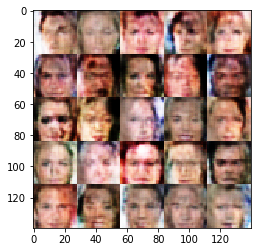

Epoch 1/1... Discriminator Loss: 1.9194... Generator Loss: 3.7437
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 0.4432
Epoch 1/1... Discriminator Loss: 1.0071... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 0.2149... Generator Loss: 2.7023
Epoch 1/1... Discriminator Loss: 0.4714... Generator Loss: 2.2191
Epoch 1/1... Discriminator Loss: 0.8998... Generator Loss: 0.9757
Epoch 1/1... Discriminator Loss: 2.2763... Generator Loss: 3.4778
Epoch 1/1... Discriminator Loss: 0.5128... Generator Loss: 2.6823
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 0.6202
Epoch 1/1... Discriminator Loss: 0.5651... Generator Loss: 1.4279


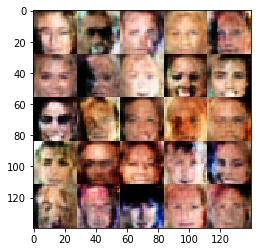

Epoch 1/1... Discriminator Loss: 0.2854... Generator Loss: 3.0820
Epoch 1/1... Discriminator Loss: 0.4195... Generator Loss: 3.7693
Epoch 1/1... Discriminator Loss: 0.2705... Generator Loss: 2.3422
Epoch 1/1... Discriminator Loss: 0.4528... Generator Loss: 1.8467
Epoch 1/1... Discriminator Loss: 0.1813... Generator Loss: 2.7554
Epoch 1/1... Discriminator Loss: 1.4705... Generator Loss: 0.4097
Epoch 1/1... Discriminator Loss: 0.2318... Generator Loss: 2.0807
Epoch 1/1... Discriminator Loss: 0.1778... Generator Loss: 2.3180
Epoch 1/1... Discriminator Loss: 3.1167... Generator Loss: 0.0807
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 0.7148


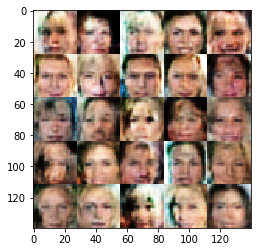

Epoch 1/1... Discriminator Loss: 0.2263... Generator Loss: 2.2423
Epoch 1/1... Discriminator Loss: 0.5624... Generator Loss: 2.9471
Epoch 1/1... Discriminator Loss: 0.2273... Generator Loss: 3.2330
Epoch 1/1... Discriminator Loss: 0.7494... Generator Loss: 1.5177
Epoch 1/1... Discriminator Loss: 0.7986... Generator Loss: 3.3392
Epoch 1/1... Discriminator Loss: 0.6139... Generator Loss: 1.4037
Epoch 1/1... Discriminator Loss: 0.2369... Generator Loss: 2.2870
Epoch 1/1... Discriminator Loss: 0.2853... Generator Loss: 1.7910
Epoch 1/1... Discriminator Loss: 0.1920... Generator Loss: 2.7344
Epoch 1/1... Discriminator Loss: 0.1083... Generator Loss: 3.0390


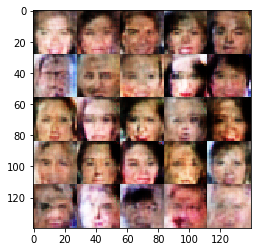

Epoch 1/1... Discriminator Loss: 0.0415... Generator Loss: 4.8645
Epoch 1/1... Discriminator Loss: 1.0904... Generator Loss: 0.5115
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 1.0335
Epoch 1/1... Discriminator Loss: 0.9053... Generator Loss: 1.9082
Epoch 1/1... Discriminator Loss: 0.5741... Generator Loss: 1.9614
Epoch 1/1... Discriminator Loss: 0.1569... Generator Loss: 2.5986
Epoch 1/1... Discriminator Loss: 0.3279... Generator Loss: 1.7198
Epoch 1/1... Discriminator Loss: 0.2034... Generator Loss: 2.5119
Epoch 1/1... Discriminator Loss: 0.7182... Generator Loss: 1.3253
Epoch 1/1... Discriminator Loss: 0.1505... Generator Loss: 2.7274


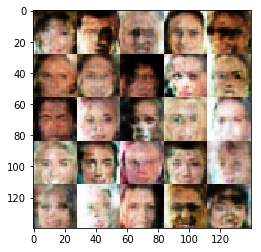

Epoch 1/1... Discriminator Loss: 0.1476... Generator Loss: 3.0031
Epoch 1/1... Discriminator Loss: 0.5972... Generator Loss: 1.1078
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.2651... Generator Loss: 0.4902
Epoch 1/1... Discriminator Loss: 0.9669... Generator Loss: 1.7336
Epoch 1/1... Discriminator Loss: 1.0196... Generator Loss: 2.4051
Epoch 1/1... Discriminator Loss: 1.0105... Generator Loss: 1.8814
Epoch 1/1... Discriminator Loss: 0.9394... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 0.4327... Generator Loss: 1.4903


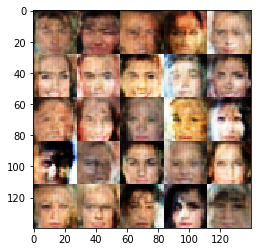

Epoch 1/1... Discriminator Loss: 0.2022... Generator Loss: 3.8890
Epoch 1/1... Discriminator Loss: 0.2898... Generator Loss: 2.0965
Epoch 1/1... Discriminator Loss: 1.4409... Generator Loss: 2.3733
Epoch 1/1... Discriminator Loss: 0.4266... Generator Loss: 2.3107
Epoch 1/1... Discriminator Loss: 1.1996... Generator Loss: 2.8940
Epoch 1/1... Discriminator Loss: 1.1632... Generator Loss: 0.5314
Epoch 1/1... Discriminator Loss: 0.8986... Generator Loss: 0.7738
Epoch 1/1... Discriminator Loss: 0.4009... Generator Loss: 2.3648
Epoch 1/1... Discriminator Loss: 1.1362... Generator Loss: 0.5241
Epoch 1/1... Discriminator Loss: 0.4996... Generator Loss: 1.2180


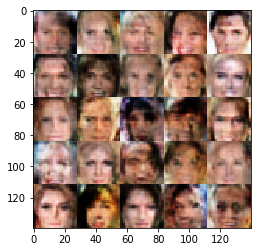

Epoch 1/1... Discriminator Loss: 0.2644... Generator Loss: 2.7279
Epoch 1/1... Discriminator Loss: 0.6797... Generator Loss: 1.6467
Epoch 1/1... Discriminator Loss: 0.5230... Generator Loss: 1.3950
Epoch 1/1... Discriminator Loss: 0.4916... Generator Loss: 3.3250
Epoch 1/1... Discriminator Loss: 0.2242... Generator Loss: 2.8561
Epoch 1/1... Discriminator Loss: 0.3527... Generator Loss: 1.9972
Epoch 1/1... Discriminator Loss: 0.2688... Generator Loss: 2.5784
Epoch 1/1... Discriminator Loss: 0.7043... Generator Loss: 0.9091
Epoch 1/1... Discriminator Loss: 0.0917... Generator Loss: 3.8045
Epoch 1/1... Discriminator Loss: 0.3223... Generator Loss: 2.0471


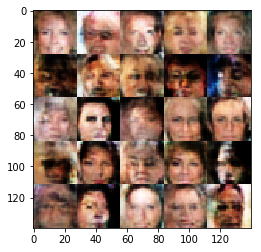

Epoch 1/1... Discriminator Loss: 0.0698... Generator Loss: 3.9651
Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 1.7075... Generator Loss: 0.3343
Epoch 1/1... Discriminator Loss: 0.6712... Generator Loss: 1.6128
Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 1.8526
Epoch 1/1... Discriminator Loss: 0.3940... Generator Loss: 1.5409
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.4503
Epoch 1/1... Discriminator Loss: 0.3385... Generator Loss: 1.5503
Epoch 1/1... Discriminator Loss: 0.3030... Generator Loss: 2.0563
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 3.4612


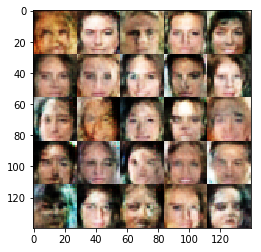

Epoch 1/1... Discriminator Loss: 0.3836... Generator Loss: 1.5177
Epoch 1/1... Discriminator Loss: 0.1552... Generator Loss: 3.1011
Epoch 1/1... Discriminator Loss: 0.1975... Generator Loss: 2.7764
Epoch 1/1... Discriminator Loss: 3.0097... Generator Loss: 3.9304
Epoch 1/1... Discriminator Loss: 1.0562... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 0.7883... Generator Loss: 1.3733
Epoch 1/1... Discriminator Loss: 0.6389... Generator Loss: 1.7002
Epoch 1/1... Discriminator Loss: 0.6068... Generator Loss: 1.5568
Epoch 1/1... Discriminator Loss: 0.7759... Generator Loss: 0.8882
Epoch 1/1... Discriminator Loss: 0.7365... Generator Loss: 1.3899


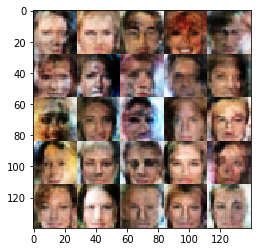

Epoch 1/1... Discriminator Loss: 0.3493... Generator Loss: 2.4627
Epoch 1/1... Discriminator Loss: 1.7728... Generator Loss: 0.2477
Epoch 1/1... Discriminator Loss: 1.9546... Generator Loss: 0.2325
Epoch 1/1... Discriminator Loss: 0.1339... Generator Loss: 2.9331
Epoch 1/1... Discriminator Loss: 0.7264... Generator Loss: 2.1923
Epoch 1/1... Discriminator Loss: 0.7647... Generator Loss: 0.9554
Epoch 1/1... Discriminator Loss: 0.3325... Generator Loss: 1.8705
Epoch 1/1... Discriminator Loss: 0.4794... Generator Loss: 1.3530
Epoch 1/1... Discriminator Loss: 2.1408... Generator Loss: 3.1374
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.4381


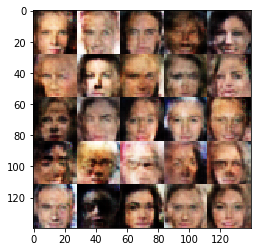

Epoch 1/1... Discriminator Loss: 0.1869... Generator Loss: 2.7953
Epoch 1/1... Discriminator Loss: 0.4538... Generator Loss: 4.1576
Epoch 1/1... Discriminator Loss: 0.8100... Generator Loss: 0.8696
Epoch 1/1... Discriminator Loss: 0.7224... Generator Loss: 2.1958
Epoch 1/1... Discriminator Loss: 0.1269... Generator Loss: 4.3860
Epoch 1/1... Discriminator Loss: 0.1534... Generator Loss: 2.7166
Epoch 1/1... Discriminator Loss: 0.0599... Generator Loss: 4.1501
Epoch 1/1... Discriminator Loss: 0.4085... Generator Loss: 1.4028
Epoch 1/1... Discriminator Loss: 0.2770... Generator Loss: 1.9546
Epoch 1/1... Discriminator Loss: 0.0963... Generator Loss: 2.8979


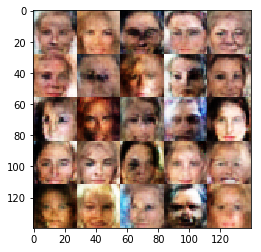

Epoch 1/1... Discriminator Loss: 1.6406... Generator Loss: 0.3607
Epoch 1/1... Discriminator Loss: 1.0895... Generator Loss: 3.2909
Epoch 1/1... Discriminator Loss: 0.5396... Generator Loss: 1.5453
Epoch 1/1... Discriminator Loss: 1.0748... Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 1.0285... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.0902... Generator Loss: 4.7208
Epoch 1/1... Discriminator Loss: 0.4850... Generator Loss: 1.2528
Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 2.5915
Epoch 1/1... Discriminator Loss: 0.6306... Generator Loss: 1.3273
Epoch 1/1... Discriminator Loss: 1.8495... Generator Loss: 0.2208


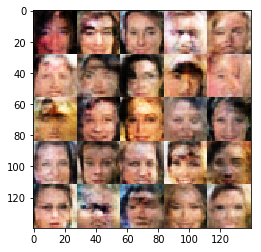

Epoch 1/1... Discriminator Loss: 0.6243... Generator Loss: 2.2707
Epoch 1/1... Discriminator Loss: 0.3456... Generator Loss: 1.7817
Epoch 1/1... Discriminator Loss: 0.1684... Generator Loss: 2.8624
Epoch 1/1... Discriminator Loss: 3.4876... Generator Loss: 5.8761
Epoch 1/1... Discriminator Loss: 0.9966... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 0.9024... Generator Loss: 0.7708
Epoch 1/1... Discriminator Loss: 0.1922... Generator Loss: 3.0941
Epoch 1/1... Discriminator Loss: 0.1292... Generator Loss: 3.3942
Epoch 1/1... Discriminator Loss: 0.1227... Generator Loss: 3.5079
Epoch 1/1... Discriminator Loss: 1.7962... Generator Loss: 4.4206


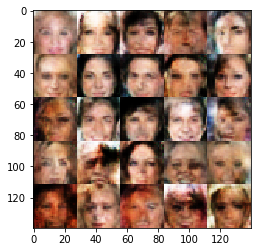

Epoch 1/1... Discriminator Loss: 0.7452... Generator Loss: 3.7029
Epoch 1/1... Discriminator Loss: 0.5656... Generator Loss: 1.2201
Epoch 1/1... Discriminator Loss: 0.0781... Generator Loss: 3.7901
Epoch 1/1... Discriminator Loss: 0.4626... Generator Loss: 2.2842
Epoch 1/1... Discriminator Loss: 1.7378... Generator Loss: 3.2581
Epoch 1/1... Discriminator Loss: 0.6117... Generator Loss: 1.2572
Epoch 1/1... Discriminator Loss: 0.4372... Generator Loss: 2.5170
Epoch 1/1... Discriminator Loss: 0.1690... Generator Loss: 4.0872
Epoch 1/1... Discriminator Loss: 0.0676... Generator Loss: 5.1179
Epoch 1/1... Discriminator Loss: 0.7668... Generator Loss: 1.0225


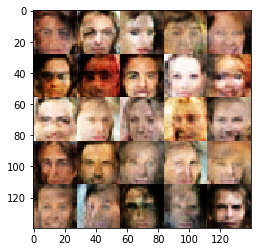

Epoch 1/1... Discriminator Loss: 0.7715... Generator Loss: 0.9452
Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 0.6365
Epoch 1/1... Discriminator Loss: 0.3283... Generator Loss: 1.6102
Epoch 1/1... Discriminator Loss: 0.6108... Generator Loss: 0.9608
Epoch 1/1... Discriminator Loss: 0.1418... Generator Loss: 2.4445
Epoch 1/1... Discriminator Loss: 0.6345... Generator Loss: 6.1540
Epoch 1/1... Discriminator Loss: 0.3827... Generator Loss: 1.4999
Epoch 1/1... Discriminator Loss: 0.9143... Generator Loss: 3.2956
Epoch 1/1... Discriminator Loss: 0.5491... Generator Loss: 1.1259
Epoch 1/1... Discriminator Loss: 0.5327... Generator Loss: 1.4821


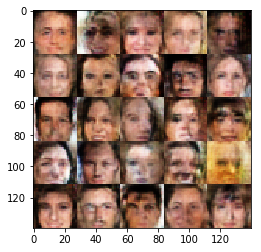

Epoch 1/1... Discriminator Loss: 0.5143... Generator Loss: 1.8182
Epoch 1/1... Discriminator Loss: 1.5160... Generator Loss: 3.7520
Epoch 1/1... Discriminator Loss: 0.3909... Generator Loss: 1.7385
Epoch 1/1... Discriminator Loss: 0.1649... Generator Loss: 2.5531
Epoch 1/1... Discriminator Loss: 0.4769... Generator Loss: 1.8687
Epoch 1/1... Discriminator Loss: 0.1036... Generator Loss: 3.1588
Epoch 1/1... Discriminator Loss: 0.0683... Generator Loss: 3.5235
Epoch 1/1... Discriminator Loss: 0.8207... Generator Loss: 3.6999
Epoch 1/1... Discriminator Loss: 1.0289... Generator Loss: 0.8256
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 0.5609


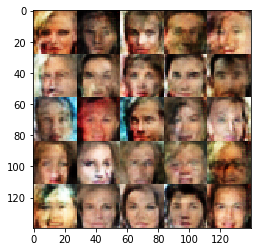

Epoch 1/1... Discriminator Loss: 1.6067... Generator Loss: 0.3441
Epoch 1/1... Discriminator Loss: 0.2096... Generator Loss: 2.6160
Epoch 1/1... Discriminator Loss: 0.1880... Generator Loss: 6.4112
Epoch 1/1... Discriminator Loss: 0.0319... Generator Loss: 5.7088
Epoch 1/1... Discriminator Loss: 0.1623... Generator Loss: 3.5690
Epoch 1/1... Discriminator Loss: 2.8377... Generator Loss: 4.1153
Epoch 1/1... Discriminator Loss: 0.3771... Generator Loss: 1.7925
Epoch 1/1... Discriminator Loss: 0.2628... Generator Loss: 2.0016
Epoch 1/1... Discriminator Loss: 0.1090... Generator Loss: 3.0471
Epoch 1/1... Discriminator Loss: 0.4158... Generator Loss: 1.9381


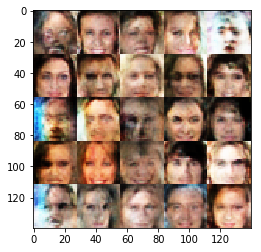

Epoch 1/1... Discriminator Loss: 0.1329... Generator Loss: 3.2108
Epoch 1/1... Discriminator Loss: 0.3584... Generator Loss: 1.8671
Epoch 1/1... Discriminator Loss: 1.1614... Generator Loss: 0.7818
Epoch 1/1... Discriminator Loss: 0.4910... Generator Loss: 1.6271
Epoch 1/1... Discriminator Loss: 0.9269... Generator Loss: 0.6582
Epoch 1/1... Discriminator Loss: 0.4462... Generator Loss: 1.9938
Epoch 1/1... Discriminator Loss: 0.7950... Generator Loss: 3.5443
Epoch 1/1... Discriminator Loss: 0.5806... Generator Loss: 1.2458
Epoch 1/1... Discriminator Loss: 0.2613... Generator Loss: 2.2735
Epoch 1/1... Discriminator Loss: 0.1019... Generator Loss: 3.0605


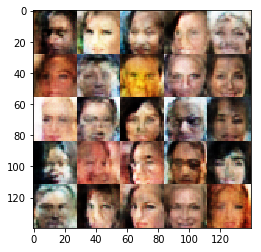

Epoch 1/1... Discriminator Loss: 0.7307... Generator Loss: 0.9181
Epoch 1/1... Discriminator Loss: 0.3477... Generator Loss: 1.5039
Epoch 1/1... Discriminator Loss: 0.2678... Generator Loss: 6.9990
Epoch 1/1... Discriminator Loss: 0.1556... Generator Loss: 5.1242
Epoch 1/1... Discriminator Loss: 0.0578... Generator Loss: 3.7721
Epoch 1/1... Discriminator Loss: 0.0445... Generator Loss: 3.9975
Epoch 1/1... Discriminator Loss: 0.0379... Generator Loss: 5.4054
Epoch 1/1... Discriminator Loss: 0.0403... Generator Loss: 5.8790
Epoch 1/1... Discriminator Loss: 0.6389... Generator Loss: 2.1968
Epoch 1/1... Discriminator Loss: 2.1904... Generator Loss: 5.4114


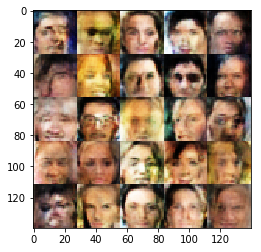

Epoch 1/1... Discriminator Loss: 0.8612... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 0.3608... Generator Loss: 1.8317
Epoch 1/1... Discriminator Loss: 3.3334... Generator Loss: 5.5271
Epoch 1/1... Discriminator Loss: 0.2207... Generator Loss: 2.1986
Epoch 1/1... Discriminator Loss: 0.4228... Generator Loss: 2.1482
Epoch 1/1... Discriminator Loss: 0.4828... Generator Loss: 1.4213


In [44]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)